In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from src.funcs import get_t, backtest_portfolio, plot_weights, get_stats

In [3]:
# allocate weights
portfolio_name = "Portfolio"
tickers = ["G500.L", "XRSG.L", "SGLN.L", "CSH2.L"]
weights = pd.Series([0.3, 0.15, 0.3, 0.25], index=tickers)

sort_indices = np.argsort(tickers)
weights = weights[sort_indices]

# get ticker data
(t_names, t_prices, t_returns, t_cum_returns) = get_t(
    tickers=tickers, start=dt.datetime.now() - dt.timedelta(days=365 * 10)
)

/var/folders/2h/lwnq838s0czgvsm5zvflygf40000gn/T/ipykernel_3300/2163426640.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weights = weights[sort_indices]
[*********************100%***********************]  4 of 4 completed


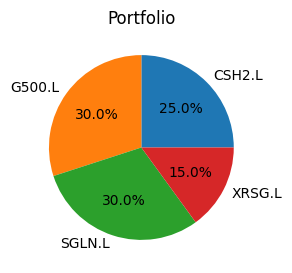

In [4]:
# visualize weights
_, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_weights(weights=weights, title=portfolio_name, ax=ax)

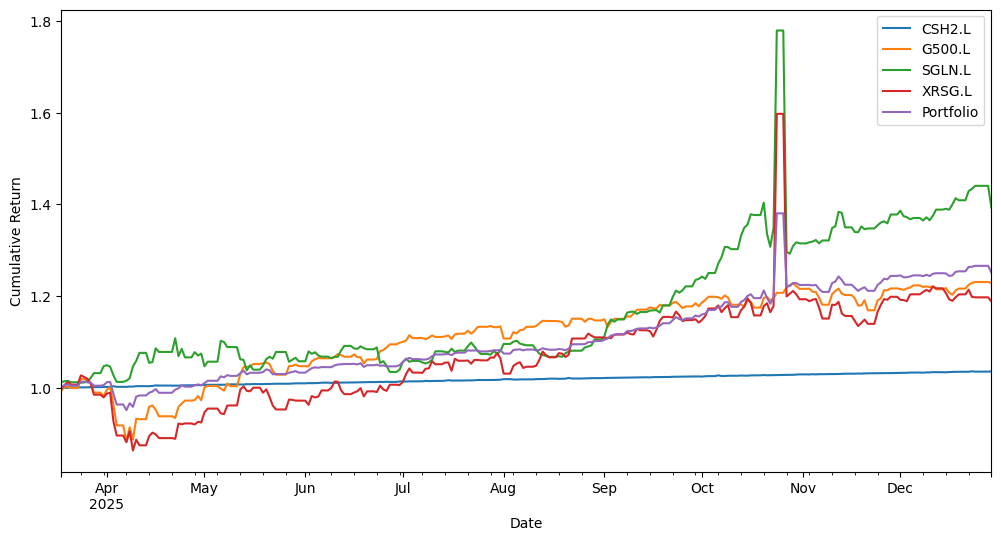

In [5]:
# backtest asset performance
_, ax = plt.subplots(1, 1, figsize=(12, 9))
for ticker in t_returns.columns:
    _ = backtest_portfolio(
        t_returns=t_returns.loc[:, ticker].to_frame(),
        weights=[1.0],
        portfolio_name=ticker,
        PLOT=True,
        ax=ax,
    )

# backtest portfolio
portfolio_cum_return = backtest_portfolio(
    t_returns=t_returns,
    weights=weights,
    portfolio_name=portfolio_name,
    PLOT=True,
    ax=ax,
)

In [6]:
# tickers and portfolio stats
stats = pd.DataFrame()
for ticker in tickers:
    stats = pd.concat(
        (stats, get_stats(t_prices=t_cum_returns.loc[:, ticker])), axis=0
    )
stats = pd.concat(
    (stats, get_stats(t_prices=portfolio_cum_return.iloc[:, 0])), axis=0
)
print(stats.to_string())

           Annualized Returns [%]  Annualized Volatility [%]  Max Drawdown [%]
G500.L                  20.510578                  14.034466        -13.289554
XRSG.L                  16.600243                  44.144954        -28.939073
SGLN.L                  32.352090                  42.242704        -27.328810
CSH2.L                   3.152626                   0.577588         -0.157624
Portfolio               21.640691                  19.412084        -12.397061


In [7]:
# save backtest
plt.savefig("outputs/all_weather_portfolio_backtest" + ".png")

<Figure size 640x480 with 0 Axes>